#The Emergence of isolated coherent vorticies in geostrophic turbulence
### Using PyQG to reproduce McWilliams JFM 1984

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.25})
plt.rcParams['image.cmap'] = 'RdBu_r'
ct = np.linspace(-55,55.,12)
%matplotlib inline

from pyqg import bt_model
reload(bt_model)

<module 'pyqg.bt_model' from '/home/rpa/pyqg/pyqg/bt_model.pyc'>

# The barotropic model  
McWilliams performed freely 2D turbulence ($R_d = \infty$, $\beta =0$) experiments on a $2\pi\times 2\pi$ periodic box.

In [2]:
# the model object
year = 1.
m = bt_model.BTModel(L=2.*pi,nx=256, tmax = 50*year,
        beta = 0., H = 1., rek = 0., rd = None, dt = 0.001,
                     taveint=year, use_fftw=True, ntd=4)

# Initial condition
The initial condition is random, with a prescribed spectrum
\begin{equation}
|\hat{\psi}|^2 = A \,\kappa^{-1}\left[1 + \left(\frac{\kappa}{6}\right)^4\right]^{-1}\,,
\end{equation}
where $\kappa$ is the wavenumber magnitude. The constant A is determined so that the initial energy is $KE = 0.5$.

In [6]:
# McWilliams 84 IC condition
fk = m.wv != 0
ckappa = np.zeros_like(m.wv2)
ckappa[fk] = np.sqrt( m.wv2[fk]*(1. + (m.wv2[fk]/36.)**2) )**-1

nhx,nhy = m.wv2.shape

Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa

Pi = m.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()
Pi_hat = m.fft( Pi )
KEaux = m.spec_var( m.wv*Pi_hat )

pih = ( Pi_hat/np.sqrt(KEaux) )
qih = -m.wv2*pih
qi = m.ifft(qih)

In [8]:
m.set_q(qi)

<matplotlib.colorbar.Colorbar instance at 0x7fd00e18acb0>

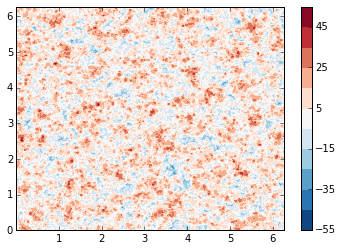

In [10]:
plt.contourf(m.x,m.y,m.q.squeeze(),ct)
plt.colorbar()

# Run the model

In [11]:
m.run()

t=               1, tc=      1000: cfl=0.107909, ke=0.496665139
t=               1, tc=      2000: cfl=0.120848, ke=0.495333885
t=               2, tc=      3000: cfl=0.102789, ke=0.494567447
t=               3, tc=      4000: cfl=0.101403, ke=0.494099275
t=               5, tc=      5000: cfl=0.088366, ke=0.493751507
t=               6, tc=      6000: cfl=0.100391, ke=0.493524276
t=               7, tc=      7000: cfl=0.101594, ke=0.493381998
t=               8, tc=      8000: cfl=0.106413, ke=0.493275101
t=               9, tc=      9000: cfl=0.139643, ke=0.493176074
t=               9, tc=     10000: cfl=0.129336, ke=0.493094853
t=              10, tc=     11000: cfl=0.116071, ke=0.493033545
t=              11, tc=     12000: cfl=0.103122, ke=0.492980981
t=              12, tc=     13000: cfl=0.104002, ke=0.492938917
t=              13, tc=     14000: cfl=0.105104, ke=0.492898890
t=              14, tc=     15000: cfl=0.110358, ke=0.492854640
t=              15, tc=     16000: cfl=0

The genious of McWilliams 1984 was that he has shown that the initial random vorticity field has organized itself in strong coherent structure. This is true in significant part of the parameter space. This was previously remarked, mainly because people did not have computer resources to run the simulation long enough. Thirty years later we can perform such simulations in a couple of minutes!

Also, note that the energy is nearly conserved, as it should be, and this is a nice test of the model.

<matplotlib.colorbar.Colorbar instance at 0x7fd00c7b1a70>

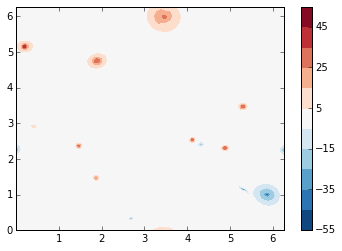

In [12]:
plt.contourf(m.x,m.y,m.q.squeeze(),ct)
plt.colorbar()

# Plotting spectra

In [13]:
KEspec = m.get_diagnostic('KEspec')
Ensspec = m.get_diagnostic('Ensspec')

In [14]:
from pyqg import diagnostic_tools as tools

In [15]:
kr,ke_ispec = tools.calc_ispec(m,KEspec.squeeze())
_, ens_ispec = tools.calc_ispec(m,Ensspec.squeeze()

IndexError: index 1 is out of bounds for axis 0 with size 1

(1e-10, 1.0)

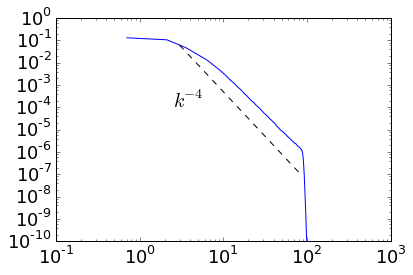

In [243]:
ks = np.array([3.,80])
es = 5*ks**-4
plt.loglog(kr,ke_ispec)
plt.loglog(ks,es,'k--')
plt.text(2.5,.0001,r'$k^{-4}$',fontsize=20)
plt.ylim(1.e-10,1.e0)

(0.001, 1.0)

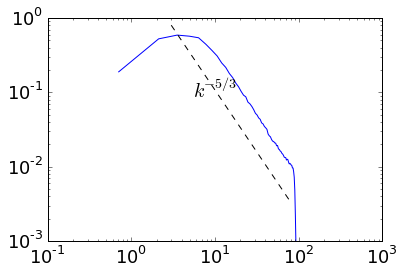

In [244]:
ks = np.array([3.,80])
es = 5*ks**(-5./3)
plt.loglog(kr,ens_ispec)
plt.loglog(ks,es,'k--')
plt.text(5.5,.085,r'$k^{-5/3}$',fontsize=20)
plt.ylim(1.e-3,1.e0)